In [1]:
pwd

'/Users/Aneequa'

# Importing libraries

In [2]:


import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

from sklearn import tree
from os import system

from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('credit.csv')
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [4]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [5]:
df.tail(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
990,unknown,12,critical,education,3565,unknown,< 1 year,2,1,37,none,own,2,unskilled,2,no,no
991,unknown,15,very good,furniture/appliances,1569,100 - 500 DM,> 7 years,4,4,34,bank,own,1,unskilled,2,no,no
992,< 0 DM,18,good,furniture/appliances,1936,unknown,4 - 7 years,2,4,23,none,rent,2,unskilled,1,no,no
993,< 0 DM,36,good,furniture/appliances,3959,< 100 DM,unemployed,4,3,30,none,own,1,management,1,yes,no
994,unknown,12,good,car,2390,unknown,> 7 years,4,3,50,none,own,1,skilled,1,yes,no
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [6]:
df.shape

(1000, 17)

In [7]:
df.info()  #many columns are of type object i.e,strings. These need to be converted to ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


# Converting  the columns with an object datatype into categorical variable 

In [9]:
for feature in df.columns:# Loop through all columns in the dataframe
    if df[feature].dtype == 'object':# Only apply for columns with categorical strings
        df[feature] =pd.Categorical(df[feature])# Replace strings with an integer

In [10]:
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [11]:
print(df.checking_balance.value_counts())
print(df.credit_history.value_counts())
print(df.purpose.value_counts())
print(df.savings_balance.value_counts())
print(df.employment_duration.value_counts())
print(df.other_credit.value_counts())
print(df.housing.value_counts())
print(df.job.value_counts())
print(df.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


# SPLIT DATA

BUILD DECISION TREE MODEL
WE WILL BUILD OUR MODEL USING THE DECISIONTREECLASSIFIER FUNCTION.USING DEFAULT "GINI" CRITERIA TO SPLIT .OTHER OPTION INCLUDE "ENTROPY"

In [12]:
replaceStruct = {
    "checking_balance":{"< 0 DM":1,"1 - 200 DM":2,"> 200 DM":3,"unknown":-1},
    "credit_history":{"critical":1,"poor":2,"good":3,"very good":4,"perfect":5},
    "savings_balance":{"< 100 DM":1, "100 - 500 DM":2, "500 - 1000 DM":3, "> 1000 DM":4,"unknown":-1},
    "employment_duration":{"unemployed":1,"< 1 year":2,"1 - 4 years":3,"4 - 7 years":4,"> 7 years":5},
    "phone":{"no":1,"yes":2},
    "default":{"no":0,"yes":1}
}
oneHotCols=["purpose","housing","other_credit","job"]
df=df.replace(replaceStruct)
df=pd.get_dummies(df,columns=oneHotCols,dtype="int")   #binary concepts
df.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [13]:
oneHotCols=["purpose","housing","other_credit","job"]


In [14]:
X=df.drop("default",axis=1) #x is everything but default
y=df.pop("default") #y values are only defaults

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= .30,random_state=1)

## BUILD DECISION TREE MODEL
WE WILL BUILD OUR MODEL USING THE DECISIONTREECLASSFIER FUNCTION,USING DEFAULT 'GINI'CRITERIA TO 

In [16]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1) 
dtree.fit(X_train,y_train)

#The Gini Index is a measure used in decision trees to quantify how messy or clean a dataset is. Specifically, it helps assess the impurity of the data when we use decision trees for classification


DecisionTreeClassifier(random_state=1)

### scoring our decsision tree

In [17]:
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))

1.0
0.6933333333333334


### visualizing the decision tree

In [18]:
!pip install graphviz

In [19]:
train_char_label=['No','Yes']
Credit_Tree_File=open('credit_tree.dot','w')
dot_data=tree.export_graphviz(dtree,out_file=Credit_Tree_File,
feature_names=list(X_train),class_names=list(train_char_label))
Credit_Tree_File.close()

In [20]:
retCode=system("dot-Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("credit_tree.png"))
    
#this command is to display the tree in the python interface rather than seperate website 


system command returning error:32512


sh: dot-Tpng: command not found


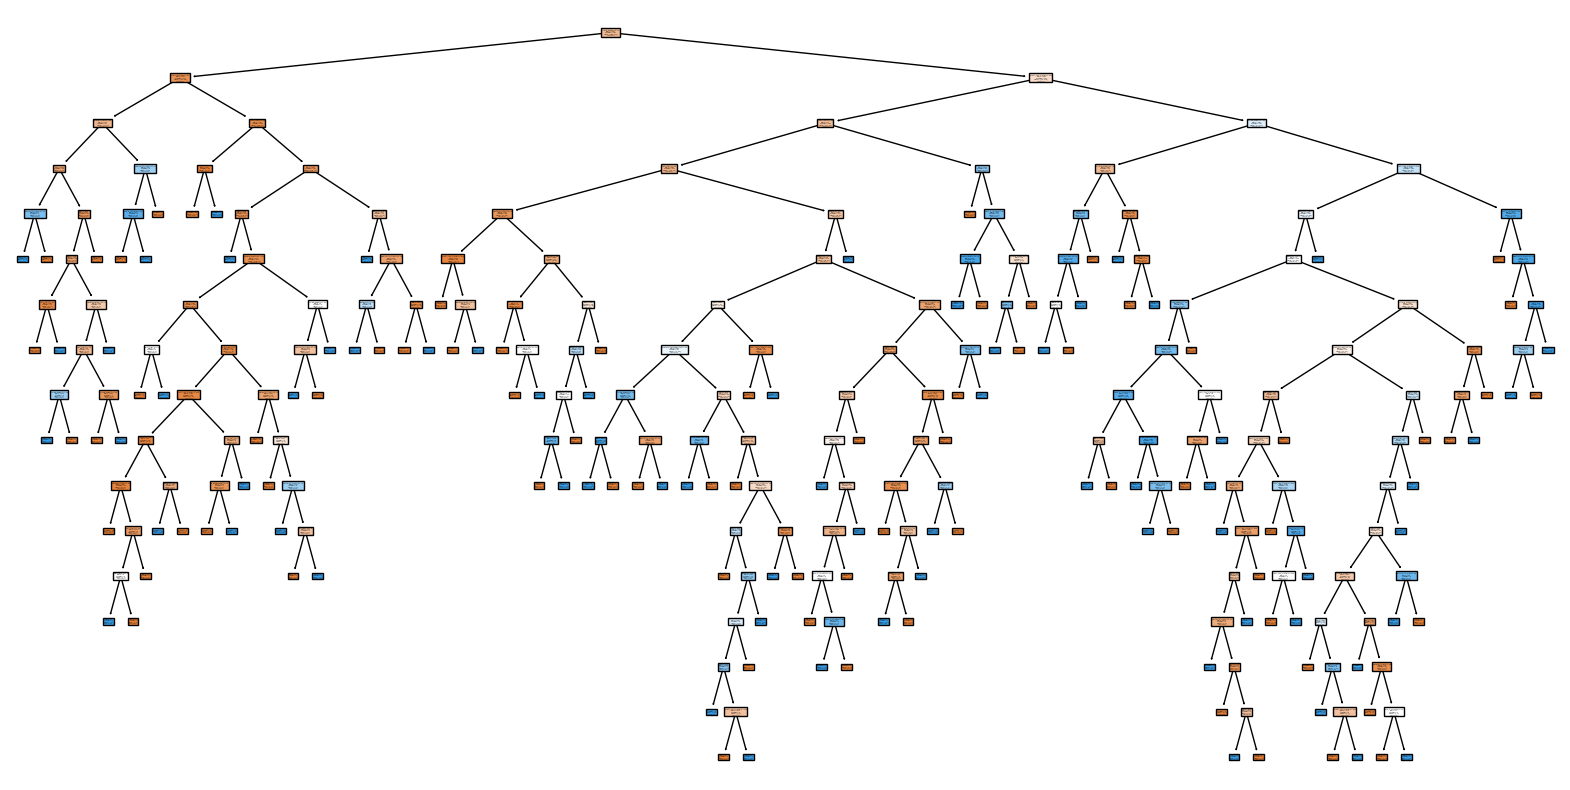

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already trained the decision tree classifier (dtree)
plt.figure(figsize=(20,10))  # Adjust the figure size as needed

# Convert the Index object to a list for feature_names
feature_names = X_train.columns.tolist()

plot_tree(dtree, feature_names=feature_names, class_names=train_char_label, filled=True)
plt.show()


http://webgraphviz.com/

# Reducing overfitting(Regulairization)

In [26]:
dtreeR = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dtreeR.fit(X_train,y_train)
print(dtreeR.score(X_train,y_train))
print(dtreeR.score(X_test,y_test))

0.7528571428571429
0.7433333333333333


#the first one is trained accuracy 
#the secind one is test accuracy 

In [23]:
train_char_label=['No','Yes']
Credit_Tree_File=open('credit_treeR.dot','w')
dot_data=tree.export_graphviz(dtree,out_file=Credit_Tree_File,
feature_names=list(X_train),class_names=list(train_char_label))
Credit_Tree_File.close()

In [27]:
print(pd.DataFrame(dtreeR.feature_importances_,columns=["Imp"],index=X_train.columns))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
amount                        0.000000
savings_balance               0.064467
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.051129
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.000000
other_credit_none             0.055977
other_credit_store            0.000000
job_management           

In [28]:
retCode=system("dot-Tpng credit_treeR.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error:32512


sh: dot-Tpng: command not found


In [29]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


In [30]:
dtree4 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dtreeR.fit(X_train,y_train)
print(dtreeR.score(X_train,y_train))
print(dtreeR.score(X_test,y_test))

0.7528571428571429
0.7433333333333333


In [31]:
dtree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [32]:
print(pd.DataFrame(dtreeR.feature_importances_,columns=["Imp"],index=X_train.columns))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
amount                        0.000000
savings_balance               0.064467
employment_duration           0.000000
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.051129
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
other_credit_bank             0.000000
other_credit_none             0.055977
other_credit_store            0.000000
job_management           

In [33]:
print(dtreeR.score(X_test, y_test))
y_predict = dtreeR.predict(X_test)

0.7433333333333333


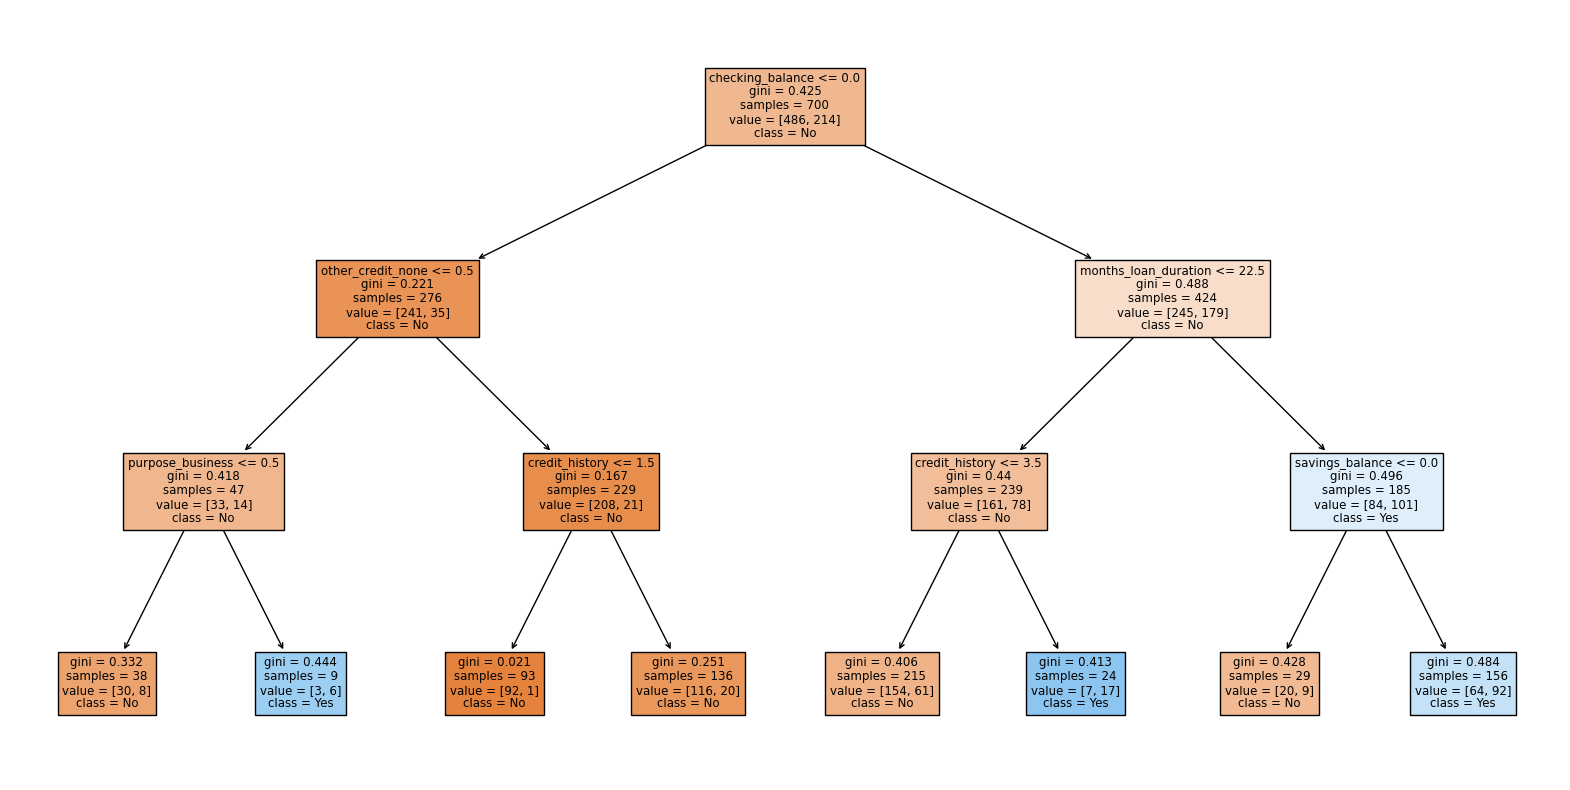

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already trained the decision tree classifier (dtree)
plt.figure(figsize=(20,10))  # Adjust the figure size as needed

# Convert the Index object to a list for feature_names
feature_names = X_train.columns.tolist()

plot_tree(dtreeR, feature_names=feature_names, class_names=train_char_label, filled=True)
plt.show()


In [34]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

<Axes: >

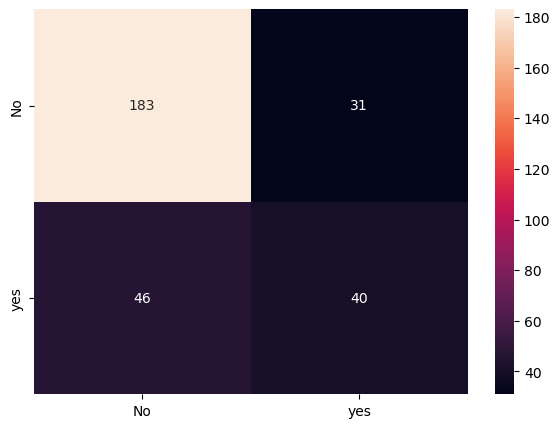

In [35]:
df_cm=pd.DataFrame(cm,index=[i for i in['No','yes']],
                  columns=[i for i in ['No','yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [36]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       214
           1       0.56      0.47      0.51        86

    accuracy                           0.74       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.73      0.74      0.74       300



# Ensemble Learning- Bagging 

In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bgcl=BaggingClassifier(estimator=dtree,n_estimators=50,random_state=1)

#bgcl = Bagging Classifier(n_estimator=50,random_state=1)

bgcl=bgcl.fit(X_train,y_train)

In [39]:
y_predict=bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.7733333333333333


In [40]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

<Axes: >

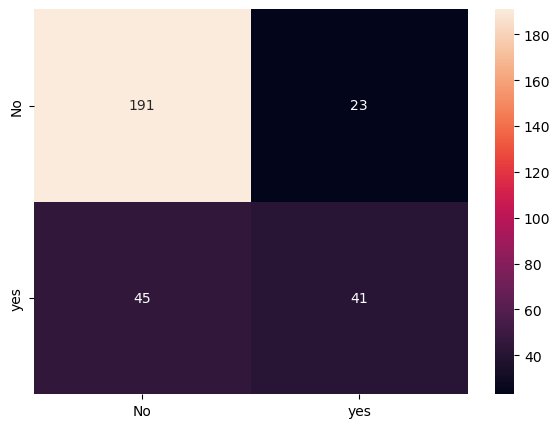

In [41]:
df_cm=pd.DataFrame(cm,index=[i for i in['No','yes']],
                  columns=[i for i in ['No','yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [42]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       214
           1       0.64      0.48      0.55        86

    accuracy                           0.77       300
   macro avg       0.72      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



# Ensemble Learning - AdaBoosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
abcl=AdaBoostClassifier(estimator=dtree,n_estimators=10,random_state=1)

#abcl = AdaBoostClassifier(n_estimator=50,random_state=1)

abcl=abcl.fit(X_train,y_train)

In [45]:
y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.6866666666666666


In [46]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

<Axes: >

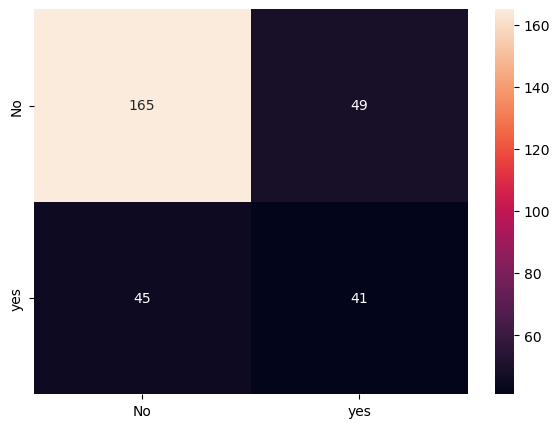

In [47]:
df_cm=pd.DataFrame(cm,index=[i for i in["No","yes"]],
                  columns=[i for i in ["No","yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [48]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       214
           1       0.46      0.48      0.47        86

    accuracy                           0.69       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.69      0.69      0.69       300



# Using dtreeR

In [49]:
abcl=AdaBoostClassifier(estimator=dtreeR,n_estimators=10,random_state=1)

#abcl = AdaBoostClassifier(n_estimator=50,random_state=1)

abcl=abcl.fit(X_train,y_train)

In [50]:
y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.6733333333333333


In [51]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

<Axes: >

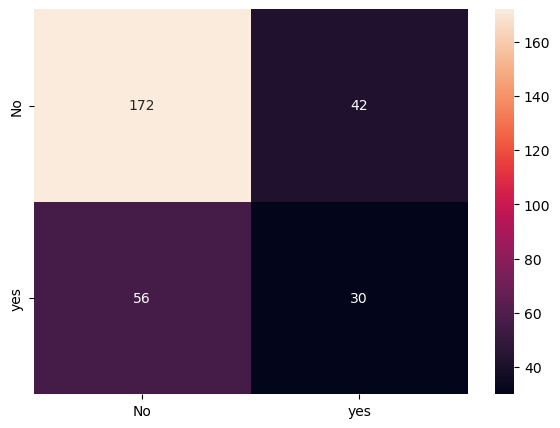

In [52]:
df_cm=pd.DataFrame(cm,index=[i for i in["No","yes"]],
                  columns=[i for i in ["No","yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [53]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       214
           1       0.42      0.35      0.38        86

    accuracy                           0.67       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.66      0.67      0.66       300



# after removing base_estimator = dtree 

0.7366666666666667


<Axes: >

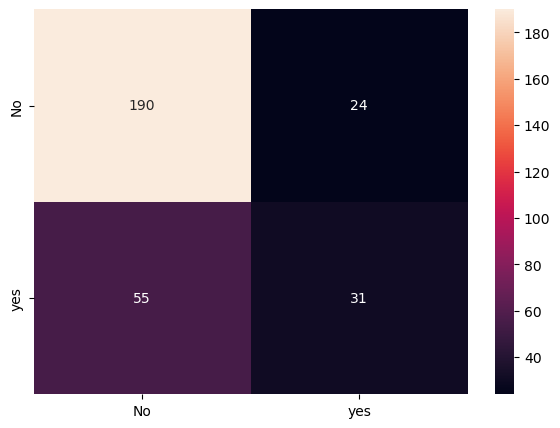

In [54]:
#abcl=AdaBoostClassifier(estimator=dtreeR,n_estimators=10,random_state=1)

abcl = AdaBoostClassifier(n_estimators=50,random_state=1)

abcl=abcl.fit(X_train,y_train)

y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in["No","yes"]],
                  columns=[i for i in ["No","yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [55]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       214
           1       0.56      0.36      0.44        86

    accuracy                           0.74       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.71      0.74      0.72       300



# Ensemble Learning - GradientBoost

In [56]:
from sklearn.ensemble import GradientBoostingClassifier


In [57]:
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)

gbcl=gbcl.fit(X_train,y_train)

0.74


<Axes: >

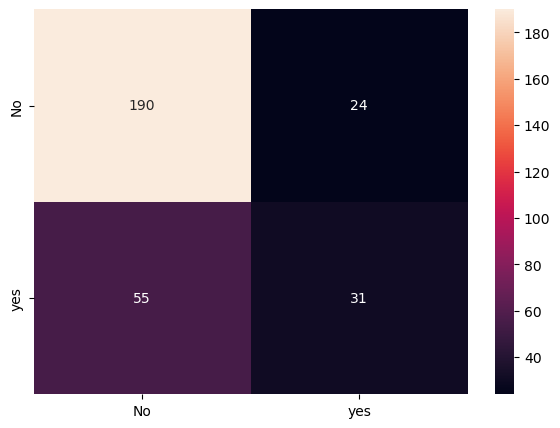

In [58]:
y_predict=abcl.predict(X_test)
print(gbcl.score(X_test,y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in["No","yes"]],
                  columns=[i for i in ["No","yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [59]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       214
           1       0.56      0.36      0.44        86

    accuracy                           0.74       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.71      0.74      0.72       300



In [60]:
#try max_depth = 3,4 or ... 10 then observe than accuracy 

In [61]:
#bagging classifiers in general benefit from having complex individuals models 
#while as boosting classifiers in general, benefit from having simple models. 
